In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import progressbar as progressbar

%load_ext autoreload
%autoreload 2

In [2]:
print(f'TF version: {tf.__version__}')
# print(tf.config.list_physical_devices())

TF version: 2.0.0


In [3]:
batch_sizes = [256]

In [29]:
store_path = '../NeuMF_storage/GS/'
gs_result_name = f'GS_NeuMF_bs_{batch_sizes[0]}'

In [30]:
res = pd.read_pickle(store_path + gs_result_name).sort_values('test_rec@10', ascending=False)

In [25]:
val_metrics = []
losses = []
for r, l in zip(res['val_metrics'], res['loss']):
    val_metrics_list = []
    losses.append(l)
    for m in r:
        val_metrics_list.append(m['recall'].iloc[2])
        
    val_metrics.append(val_metrics_list)

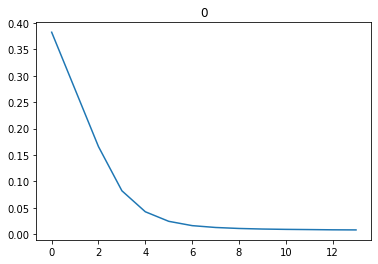

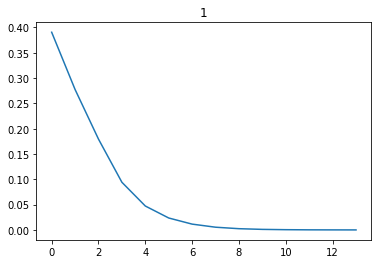

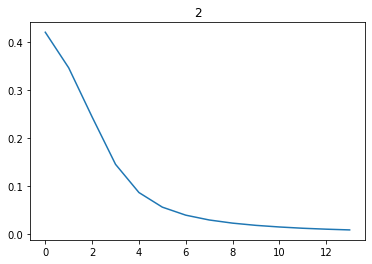

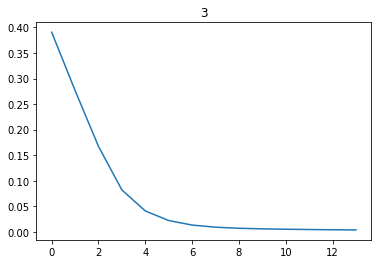

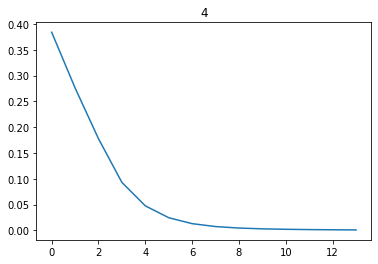

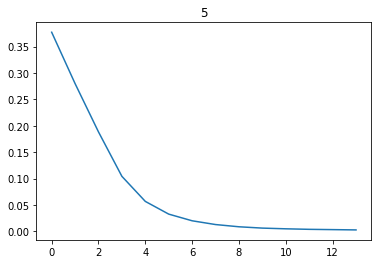

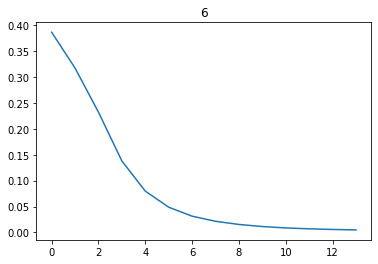

In [26]:
import matplotlib.pyplot as plt
for i, loss in enumerate(losses):
    plt.plot(loss)
    plt.title(i)
    plt.show()

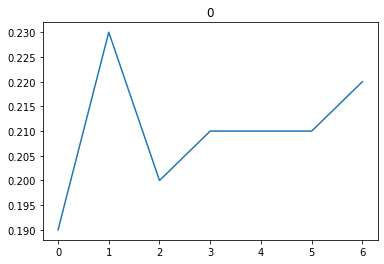

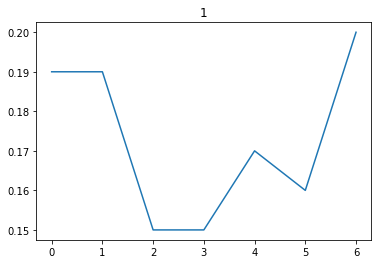

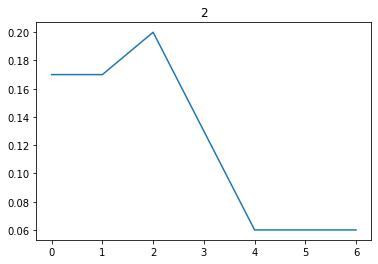

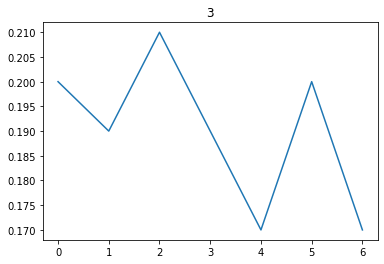

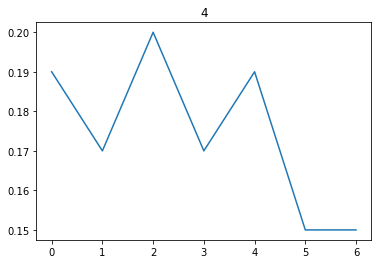

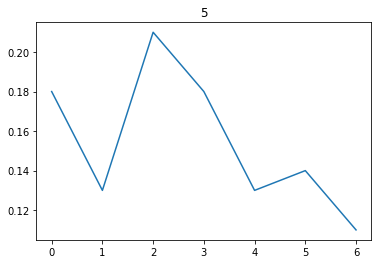

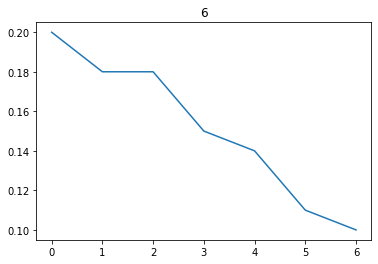

In [27]:
import matplotlib.pyplot as plt
for i, vm in enumerate(val_metrics):
    plt.plot(vm)
    plt.title(i)
    plt.show()

In [14]:
res = pd.read_pickle(store_path + gs_result_name).sort_values('learning_rate', ascending=True)

In [31]:
res

,test_rec@10,100_sample_val_rec@10,val_metrics,test_metrics,loss,train_time,learning_rate,batch_size,layers,reg_layers,reg_mf,nolf,epochs,sample_size,num_neg,ckpt_dir,optimizer
22,0.01925,0.19,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.46384, 0.35846, 0.325, 0.30419, 0.28889, 0....",1294.881698,0.0001,256,"[16, 32, 16, 8]","[1e-06, 1e-06, 1e-06, 1e-06]","[0, 0]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
20,0.01750,0.19,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.46905, 0.37478, 0.33356, 0.31043, 0.29341, ...",1531.528490,0.0001,256,"[16, 32, 16, 8]","[0, 0, 0, 0]","[0, 0]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
24,0.00500,0.18,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.4719, 0.34554, 0.33859, 0.33644, 0.33247, 0...",1309.244294,0.0001,256,"[16, 32, 16, 8]","[0.0001, 0.0001, 0.0001, 0.0001]","[0, 0]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
23,0.00425,0.15,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.44882, 0.32616, 0.30709, 0.29683, 0.28878, ...",1301.970975,0.0001,256,"[16, 32, 16, 8]","[1e-05, 1e-05, 1e-05, 1e-05]","[0, 0]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
27,0.00375,0.14,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.46073, 0.33911, 0.30314, 0.28605, 0.27259, ...",1174.188863,0.0001,256,"[16, 32, 16, 8]","[1e-06, 1e-06, 1e-06, 1e-06]","[1e-07, 1e-07]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
26,0.00275,0.16,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.47401, 0.35386, 0.312, 0.28944, 0.27353, 0....",1175.224771,0.0001,256,"[16, 32, 16, 8]","[1e-07, 1e-07, 1e-07, 1e-07]","[1e-07, 1e-07]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
28,0.00250,0.14,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.45042, 0.32833, 0.30946, 0.30101, 0.29323, ...",1179.037146,0.0001,256,"[16, 32, 16, 8]","[1e-05, 1e-05, 1e-05, 1e-05]","[1e-07, 1e-07]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
6,0.00225,0.22,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.38251, 0.27418, 0.16576, 0.08214, 0.0424, 0...",1216.533779,0.0005,256,"[16, 32, 16, 8]","[1e-07, 1e-07, 1e-07, 1e-07]","[1e-07, 1e-07]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
12,0.00200,0.18,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.38041, 0.30408, 0.26964, 0.21831, 0.16709, ...",1199.226444,0.0005,256,"[16, 32, 16, 8]","[1e-06, 1e-06, 1e-06, 1e-06]","[1e-06, 1e-06]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
18,0.00200,0.13,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.38816, 0.33972, 0.33303, 0.31139, 0.27958, ...",1282.031513,0.0005,256,"[16, 32, 16, 8]","[1e-05, 1e-05, 1e-05, 1e-05]","[1e-05, 1e-05]",8,14,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam


In [7]:
res[res['learning_rate'] == 0.0001]

,test_rec@10,val_metrics,test_metrics,loss,learning_rate,batch_size,layers,reg_layers,reg_mf,nolf,epochs,sample_size,num_neg,ckpt_dir,optimizer
113,0.26925,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.65993, 0.26496, 0.2175, 0.19695, 0.18571, 0...",0.0001,256,"[16, 32, 16, 8]","[0.001, 0.001, 0.001, 0.001]","[0.0001, 0.0001]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
103,0.26625,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.70436, 0.50344, 0.33291, 0.23848, 0.21077, ...",0.0001,256,"[16, 32, 16, 8]","[0.001, 0.001, 0.001, 0.001]","[1e-05, 1e-05]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
93,0.24675,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.64819, 0.26752, 0.2155, 0.18795, 0.16737, 0...",0.0001,256,"[16, 32, 16, 8]","[0.001, 0.001, 0.001, 0.001]","[1e-06, 1e-06]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
110,0.21825,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.39515, 0.14496, 0.05548, 0.02113, 0.01358, ...",0.0001,256,"[16, 32, 16, 8]","[1e-06, 1e-06, 1e-06, 1e-06]","[0.0001, 0.0001]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
100,0.21775,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.37522, 0.14664, 0.07382, 0.03484, 0.01431, ...",0.0001,256,"[16, 32, 16, 8]","[1e-06, 1e-06, 1e-06, 1e-06]","[1e-05, 1e-05]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
92,0.21750,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.36656, 0.1165, 0.08176, 0.05393, 0.04521, 0...",0.0001,256,"[16, 32, 16, 8]","[0.0001, 0.0001, 0.0001, 0.0001]","[1e-06, 1e-06]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
99,0.21600,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.40296, 0.16663, 0.08089, 0.03536, 0.0111, 0...",0.0001,256,"[16, 32, 16, 8]","[0, 0, 0, 1e-06]","[1e-06, 1e-06]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
112,0.21450,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.38271, 0.11902, 0.08797, 0.05652, 0.04661, ...",0.0001,256,"[16, 32, 16, 8]","[0.0001, 0.0001, 0.0001, 0.0001]","[0.0001, 0.0001]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
104,0.21450,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.37629, 0.14411, 0.07388, 0.03974, 0.01877, ...",0.0001,256,"[16, 32, 16, 8]","[1e-06, 0, 0, 0]","[1e-05, 1e-05]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam
91,0.21375,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.35201, 0.12094, 0.06541, 0.04189, 0.02086, ...",0.0001,256,"[16, 32, 16, 8]","[1e-05, 1e-05, 1e-05, 1e-05]","[1e-06, 1e-06]",8,10,343771,4,../NeuMF_storage/NeuMF_ckpts_am_40k_GS_nolf_8/...,Adam


In [6]:
store_path = '../NeuMF_storage/GS/'
gs_result_name = 'GS_GMF_with_reg_bs_128_256'
res_gmf = pd.read_pickle(store_path + gs_result_name).sort_values('test_rec@10', ascending=False)

In [7]:
res_gmf

,test_rec@10,val_metrics,test_metrics,loss,learning_rate,batch_size,nolf,regs,epochs,sample_size,num_neg,ckpt_dir,optimizer
18,0.488742,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.39013, 0.33804, 0.32791, 0.32409, 0.32258, ...",0.0005,128,8,"[1e-05, 1e-05]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
10,0.482616,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.34864, 0.28134, 0.26854, 0.26243, 0.25928, ...",0.0010,128,8,"[1e-05, 1e-05]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
22,0.479636,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.40042, 0.35553, 0.31952, 0.29065, 0.28179, ...",0.0005,256,8,"[1e-05, 1e-05]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
26,0.474834,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.47515, 0.36907, 0.36369, 0.36066, 0.35623, ...",0.0001,128,8,"[1e-05, 1e-05]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
6,0.474172,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.32209, 0.28725, 0.28254, 0.28122, 0.28072, ...",0.0050,256,8,"[1e-05, 1e-05]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
30,0.473675,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.52862, 0.39272, 0.36981, 0.36528, 0.36236, ...",0.0001,256,8,"[1e-05, 1e-05]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
2,0.468543,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.33362, 0.30598, 0.30311, 0.30237, 0.30201, ...",0.0050,128,8,"[1e-05, 1e-05]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
5,0.463907,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.4349, 0.39241, 0.38889, 0.38711, 0.38671, 0...",0.0050,256,8,"[0.0001, 0.0001]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
1,0.448179,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.43341, 0.4071, 0.40688, 0.40684, 0.40696, 0...",0.0050,128,8,"[0.0001, 0.0001]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam
3,0.437583,"[[rank_at, hitcounts, recall, precision, ndcg]...",rank_at hitcounts recall precision ...,"[0.27776, 0.23288, 0.22428, 0.22051, 0.21845, ...",0.0050,128,8,"[1e-06, 1e-06]",10,994169,4,../NeuMF_storage/GMF_ckpts_ml_1m_nolf_8/ckpts,Adam


# Read Data

In [5]:
# path = 'C:/Users/robin.opdam/Google Drive/Thesis (Msc)/Thesis_shared_files/'
path = '/Users/Robin/Google Drive/Thesis (Msc)/Thesis_shared_files/'
path = '../datasets/'

## Amazon Fashion

In [10]:
data_path = 'data/Amazon/'
# file_name = 'Amazon_full' # file_name = 'Amazon_05_users' 
# file_name = 'Amazon_01_users'
# file_name = 'am_80k_users'
# file_name = 'am_40k_users'
file_name = 'am_like_ml_01'

## MovieLens

In [5]:
# data_path = 'data/ML/'
file_name = 'ml_1m'
# file_name = 'ML_full' # file_name = 'ML_05_users'
# file_name = 'ML_01_users'

In [11]:
df = pd.read_pickle(path + file_name)
df.user_id = df.user_id.astype('category').cat.codes
df.item_id = df.item_id.astype('category').cat.codes
df.head()

,user_id,user,item,datetime,rating,item_id
0,0,A0039616ADOZ0KMWQRNX,B00QFJG1U8,2016-10-04,5.0,87754
1,0,A0039616ADOZ0KMWQRNX,B010ACF2PK,2016-10-04,5.0,104761
2,0,A0039616ADOZ0KMWQRNX,B00BFE0IZ2,2016-10-04,5.0,42989
3,0,A0039616ADOZ0KMWQRNX,B01CZMQCPC,2016-10-04,5.0,127248
4,0,A0039616ADOZ0KMWQRNX,B01B5DLG7G,2016-10-26,4.0,123866


In [7]:
test_set = pd.read_pickle(path + 'ml_1m_test')
train_set = pd.read_pickle(path + 'ml_1m_train')

In [11]:
from Data_prep import leave_users_out
remaining, subset = leave_users_out(df, 40000)

In [12]:
len(subset)

351771

In [13]:
df = subset
df.user_id = df.user_id.astype('category').cat.codes
df.item_id = df.item_id.astype('category').cat.codes

---
# Data Prep

## Dataset Params

In [12]:
val_perc = test_perc = 0.1
n_last_items_val = n_last_items_test = 1

total_items = len(df.item_id.unique())
total_users = len(df.user_id.unique())
print(f'total_items: {total_items}')
print(f'total_users: {total_users}')

total_items: 135784
total_users: 16254


## Create Split

In [9]:
from Data_prep import train_val_test_split
datasets = train_val_test_split(df, val_perc, test_perc, n_last_items_val, n_last_items_test)
train_set, val_set, test_set = datasets

---
# Neural Collaborative Filtering (NCF)
Using the NCF framework we build Generalized Matrix Factorisation (GMF), Multiplayer Perceptron Matrix Factorisation (MLP) and combine the two in Neural Matrix Factorisation (NeuMF)
- paper: http://papers.www2017.com.au.s3-website-ap-southeast-2.amazonaws.com/proceedings/p173.pdf
- blog: https://medium.com/@victorkohler/collaborative-filtering-using-deep-neural-networks-in-tensorflow-96e5d41a39a1
- code: https://github.com/Leavingseason/NeuralCF/blob/master

## Set Parameters

### CKPTS Store Paths

In [9]:
run_num = 'am_40k_nolf_8'

In [10]:
GMF_params = {
    'learning_rate': 0.001,
    'batch_size': 256,
    'nolf': 8,
    'regs': [0,0],
    'epochs': 20,
    'sample_size': len(train_set),#int(0.5*len(train_set.user_id.unique())),
    'num_neg': 8,
    'ckpt_dir': f'../NeuMF_storage/GMF_ckpts_{run_num}/ckpts',
    'optimizer':'Adam'
}

In [11]:
MLP_params = {
    'learning_rate': 0.001,
    'batch_size': 256,
    'layers': [64,32,16,8],
    'reg_layers': [0,0,0,0],
    'epochs': 20,
    'sample_size': len(train_set),#int(0.5*len(train_set.user_id.unique())),
    'num_neg': 6,
    'ckpt_dir': f'../NeuMF_storage/MLP_ckpts_{run_num}/ckpts',
    'optimizer':'Adam'
}

In [12]:
NeuMF_params = {
    'learning_rate': 0.0005,
    'batch_size': 256,
    'layers': [64,32,16,8],
    'reg_layers': [0,0,0,0],
    'reg_mf': [0, 0],
    'nolf': 8,
    'epochs': 20,
    'sample_size': len(train_set),#int(0.5*len(train_set.user_id.unique())),
    'num_neg': 6,
    'ckpt_dir': f'../NeuMF_storage/NeuMF_ckpts_{run_num}/ckpts',
    'optimizer':'Adam'
}

## Init

In [13]:
from NCF import NCF
NCF = NCF(total_users, total_items, GMF_params, MLP_params, NeuMF_params)

NCF.build_GMF_model()
NCF.build_MLP_model()
NCF.build_NeuMF_model()

## Create Samples (MP)

## Random User sampling

In [14]:
import multiprocessing as mp        
def create_sample(user_items, train_users, train_items, params, num_processes):
    samples_sizes_split = np.array_split(np.array(range(params['sample_size'])),num_processes)
    args = []
    for samples_size in samples_sizes_split:
        args.append((user_items, train_users, train_items, len(samples_size), params['num_neg']))
    with mp.Pool(processes=num_processes) as pool:
        results = pool.starmap(create_sample_worker, args)

    user_inputs, item_inputs, labels = [], [], []
    for res_epochs in results: 
        user_inputs.extend(res_epochs['u'])
        item_inputs.extend(res_epochs['i'])
        labels.extend(res_epochs['l'])

    return user_inputs, item_inputs, labels


def create_sample_worker(user_items, train_users, train_items, sample_size, num_neg):
    user_inputs, item_inputs, labels = [], [], []
    for s in range(sample_size):
        # Add positive item
        u = np.random.choice(train_users)
        u_items = user_items[u]
        i = np.random.choice(u_items)

        user_inputs.append(u)
        item_inputs.append(i)
        labels.append(1)

        # Add negative item
        for i in range(num_neg):
            j = np.random.choice(train_items)
            while j in u_items:  # neg item j cannot be in the set of pos items of user u
                j = np.random.choice(train_items)

            user_inputs.append(u)
            item_inputs.append(j)
            labels.append(0)

    return {'u':user_inputs, 'i':item_inputs, 'l':labels}

## Single user sampling

In [15]:
import multiprocessing as mp        
def create_user_sample(user_items, train_users, train_items, params, num_processes):
    users_splits = np.array_split(np.array(train_users),num_processes)
    args = []
    for user_split in users_splits:
        args.append((user_items, user_split, train_items, params['num_neg']))
    with mp.Pool(processes=num_processes) as pool:
        results = pool.starmap(create_user_sample_worker, args)

    user_inputs, item_inputs, labels = [], [], []
    for res_epochs in results: 
        user_inputs.extend(res_epochs['u'])
        item_inputs.extend(res_epochs['i'])
        labels.extend(res_epochs['l'])

    return user_inputs, item_inputs, labels


def create_user_sample_worker(user_items, train_users, train_items, num_neg):
    user_inputs, item_inputs, labels = [], [], []
    for user in train_users:
        # All positive items for this user
        u_items = user_items[user]
        
        # Per positive item, sample num_neg negative items
        for u_item in u_items:
            pos_item = np.random.choice(u_items)

            user_inputs.append(user)
            item_inputs.append(pos_item)
            labels.append(1)

            # Add negative item
            for i in range(num_neg):
                neg_item = np.random.choice(train_items)
                while neg_item in u_items:  # neg item j cannot be in the set of pos items of user u
                    neg_item = np.random.choice(train_items)

                user_inputs.append(user)
                item_inputs.append(neg_item)
                labels.append(0)

    return {'u':user_inputs, 'i':item_inputs, 'l':labels}

In [21]:
user_items = train_set.groupby('user_id')['item_id'].apply(list)
train_users = train_set.user_id.unique()
train_items = train_set.item_id.unique()

In [22]:
# store_path = 'samples_am_like_ml'
store_path = 'samples_ml_1m'
store_path = 'samples_am_40k_8_neg'
sample_name = 'am_40k_sample'
# sample_name = 'ml_1m_sample'

In [23]:
%%time
import csv
num_processes = mp.cpu_count()
val_metrics = []
for epoch in range(30):
    print(f'Epoch: {epoch}')
    user_inputs, item_inputs, labels = create_user_sample(user_items, train_users, train_items, NCF.GMF_params, num_processes)
    samples = [user_inputs, item_inputs, labels]
    file = open(f'../NeuMF_storage/{store_path}/{sample_name}_{epoch}.csv', 'w+', newline='')
    with file:
        write = csv.writer(file)
        write.writerows(samples)

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
CPU times: user 3min 6s, sys: 16.8 s, total: 3min 23s
Wall time: 11min 8s


In [27]:
file_name

'ml_1m'

In [26]:
len(samples[0])

4970845

In [18]:
users_split = np.array_split(np.array(train_users),num_processes)

(3334,)

In [43]:
import csv

file = open(f'../NeuMF_storage/samples/ml_1m_sample_test.csv', 'w+', newline='')

with file:
    write = csv.writer(file)
    write.writerows(samples)

## Read Sample

In [16]:
%%time
with open('samples.csv', 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    samples = list(csv_reader)

CPU times: user 965 ms, sys: 290 ms, total: 1.26 s
Wall time: 1.31 s
